In [196]:
import matplotlib.pyplot as plt
import pandas as pd
from model import TimeSeriesPredictor
import plotting

In [197]:
%matplotlib inline

### Выгрузим данные.

In [198]:
ts = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv', index_col='time', parse_dates=True)

In [199]:
ts.head()

,time,value
0,2012-10-02 09:00:00,5545
1,2012-10-02 10:00:00,4516
2,2012-10-02 11:00:00,4767
3,2012-10-02 12:00:00,5026
4,2012-10-02 13:00:00,4918


In [200]:
test.head()

""
time
2017-11-18 10:00:00
2017-11-18 11:00:00
2017-11-18 12:00:00
2017-11-18 13:00:00
2017-11-18 14:00:00


### Соберем временные ряды в структуру pandas Series

In [201]:
ts = pd.Series(data=ts.value.values, index=pd.to_datetime(ts.time))

In [202]:
ts.head()

time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
dtype: int64

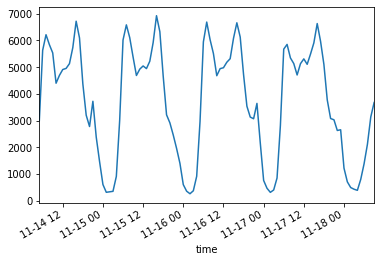

In [203]:
ts[-100:].plot()

### Обучим модель. 

In [204]:
predictor = TimeSeriesPredictor()

In [205]:
predictor.fit(ts)

### По диапазону datetime из test, поймем, насколько точек надо сделать предсказание.

In [207]:
n_hours = int((test.index[-1] - test.index[0]).total_seconds() / 3600) + 1

In [208]:
n_hours

7598

### Сделаем предсказание.

In [209]:
ts_pred = predictor.predict_next(ts, k=n_hours)

In [210]:
plotting.plot_multiple_ts(ts[-500:], ts_pred[:500])

In [212]:
ts_pred.head()

2017-11-18 10:00:00    3830.736417
2017-11-18 11:00:00    3999.971020
2017-11-18 12:00:00    4046.268914
2017-11-18 13:00:00    4086.749075
2017-11-18 14:00:00    4213.389904
dtype: float64

### "Сджойним" нужные значения в test.

In [222]:
answer = test.join(ts_pred.to_frame(), how='left')

In [223]:
answer.columns = ['value']

In [226]:
answer.to_csv('answer.csv')